## Two-Variable Hypothesis Tests

## a. Binary vs. Binary: Fisher Exact Test

In [ ]:
#H0 - There is no impact of gender on region of secondary school
#Ha - There is an impact of gender on region of secondary school

# importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt

data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()
# Displaying data in the Gen_Gender column
data['Gen_Gender'].value_counts()

Gen_Gender
Male      34
Female    12
Name: count, dtype: int64

In [ ]:
# Displaying data in the Gen_SecSchool column
data['Gen_SecSchool'].value_counts()

In [ ]:
# Data other than The Netherlands in the Gen_SecSchool column in set as 'Others'
data['Gen_SecSchool'][data['Gen_SecSchool']!='The Netherlands'] = 'Others'

data['Gen_SecSchool'].value_counts()

In [ ]:
# Visualising the data in the form of a table using mycrosstab

mycrosstab = pandas.crosstab(data['Gen_Gender'], data['Gen_SecSchool'])
mycrosstab

Gen_SecSchool,Others,The Netherlands
Gen_Gender,,
Female,4,8
Male,18,16


<function matplotlib.pyplot.show(close=None, block=None)>

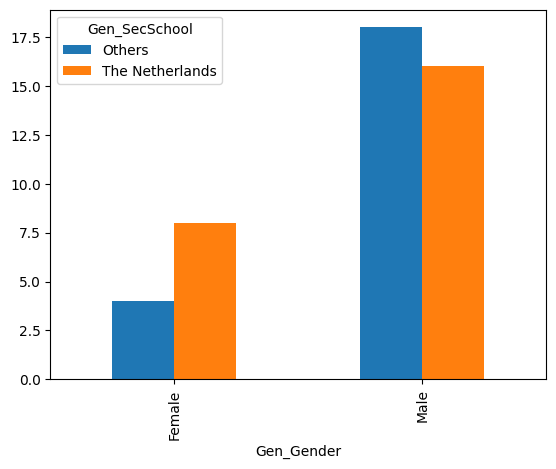

In [ ]:
# Plotting the table content in a bar
mycrosstab.plot(kind = 'bar')
plt.show

In [ ]:
# Applying the Fisher Exact test

# H0 - Both the columns Gen_Gender and Gen_SecSchool has no relation
# Ha - Both the columns Gen_Gender and Gen_SecSchool has a relation

from scipy.stats import fisher_exact

fisher_exact(mycrosstab)

SignificanceResult(statistic=0.4444444444444444, pvalue=0.32137504230527486)

In [ ]:
pvalue=0.32137504230527486

# Since pvalue > 0.05, null value is accepted

# Applying odds ratio

a = mycrosstab.iloc[0,0]
b = mycrosstab.iloc[0,1]
c = mycrosstab.iloc[1,0]
d = mycrosstab.iloc[1,1]

OR = (a/b)/(c/d)

if OR < 1.49:
  print('negligible')
elif OR < 3.45:
  print('small')
elif OR < 9:
  print('medium')
else:
  print('large')


negligible


In [ ]:
OR

0.4444444444444444

The Fisher Exact test has no impact on the two datasets as the pvalue was 0.32 and the OR value is 0.444

## b. Binary vs. Ordinal: Mann-Whitney U Test

In [ ]:
#H0 - There is no relation between gender and the activities performed by them
#Ha - There is a relation between gender and the activities performed by them

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as ps

# MAking a table od the Gen_Gender and Mix_NrAct data columns
pandas.crosstab(data['Gen_Gender'], data['Mix_NrAct'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.8/248.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=416180 sha256=006c6d75042ef6974dcc5ecc603b352490243cb169a787e9df14595364b6d7c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-wkrbuau_/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Gen_Gender,,,,,
Female,8,1,0,0,2
Male,15,1,2,14,2


In [ ]:
# Rearranging the the ordinal variables of Mix_NrAct in serial order to store in 'coding'

data['Mix_NrAct'].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

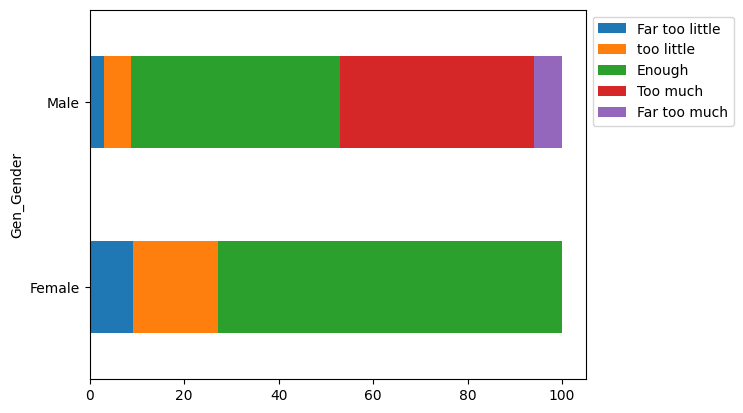

In [ ]:
coding = {'Far too little':0, 'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4}

# plotting the data in the stacked bar chart format
ps.vi_bar_stacked_multiple(data['Gen_Gender'], data['Mix_NrAct'], coding)

In [ ]:
# Replacing the data in Mix_NrAct as numeric value of 0,1,2,3,4 as string data is present in it which cannot be used to apply mathematical visualization

myOrd = data['Mix_NrAct'].replace(coding)

# Storing the Gen_Gender values in diff variables as male and female
myBin1 = data['Gen_Gender'] == 'Male'
myBin2 = data['Gen_Gender'] == 'Female'

# Droping the null values from the data records

myOrd1 = myOrd[myBin1].dropna()
myOrd2 = myOrd[myBin2].dropna()

# Applying the Mann-Whitney U Test

from scipy.stats import mannwhitneyu

mannwhitneyu(myOrd1, myOrd2, alternative = 'two-sided', use_continuity = False)

MannwhitneyuResult(statistic=285.5, pvalue=0.0044363900107872375)

In [ ]:
pvalue=0.0044363900107872375

# Since pvalue < 0.05, null value is rejected

In [ ]:
# Calculating the effect size using the Rosenthal corelation coefficient

from scipy.stats import norm
Z = norm.ppf(pvalue/2)
n = len(myOrd1) + len(myOrd2)
r_roz = abs(Z / n**0.5)

if r_roz < 0.2:
  print('very low')
elif r_roz < 0.4:
  print('low')
elif r_roz < 0.6:
  print('moderate')
elif r_roz < 0.8:
  print('strong')
else:
  print('very strong')

moderate


In [ ]:
r_roz

0.4241583947495162

The Mann Whitney U test has shown that there exist a relation between the Gender and Activities performed as pvalue = 0.0044 and it has a moderate effect on them as rosenthal corelation coefficient r_roz = 0.42

## c. Binary vs. Scale: Welch T-test

In [ ]:
# H0 - There is no association between the gender and the marks obtain
# Ha - There is an association between the gender and the marks obtain

# Displaying the Gen_Gender data
data['Gen_Gender']

0     Female
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7     Female
8       Male
9       Male
10      Male
11      Male
12      Male
13      Male
14    Female
15      Male
16       NaN
17    Female
18      Male
19      Male
20    Female
21       NaN
22    Female
23      Male
24      Male
25      Male
26      Male
27      Male
28      Male
29      Male
30    Female
31       NaN
32      Male
33      Male
34       NaN
35      Male
36      Male
37      Male
38      Male
39      Male
40       NaN
41    Female
42       NaN
43      Male
44      Male
45      Male
46      Male
47      Male
48       NaN
49       NaN
50      Male
51      Male
52    Female
53    Female
54       NaN
Name: Gen_Gender, dtype: object

In [ ]:
# Grouping the data of the columns Gen_Gender and Over_Grade together and calculating the mean and the standard deviation

data.groupby('Gen_Gender')['Over_Grade'].mean()

data.groupby('Gen_Gender')['Over_Grade'].std()

# Bifercating the Over_Grade on the basis of maleScores and the femaleScores

maleScores = data['Over_Grade'][data['Gen_Gender'] == 'Male'].dropna()
femaleScores = data['Over_Grade'][data['Gen_Gender'] == 'Female'].dropna()


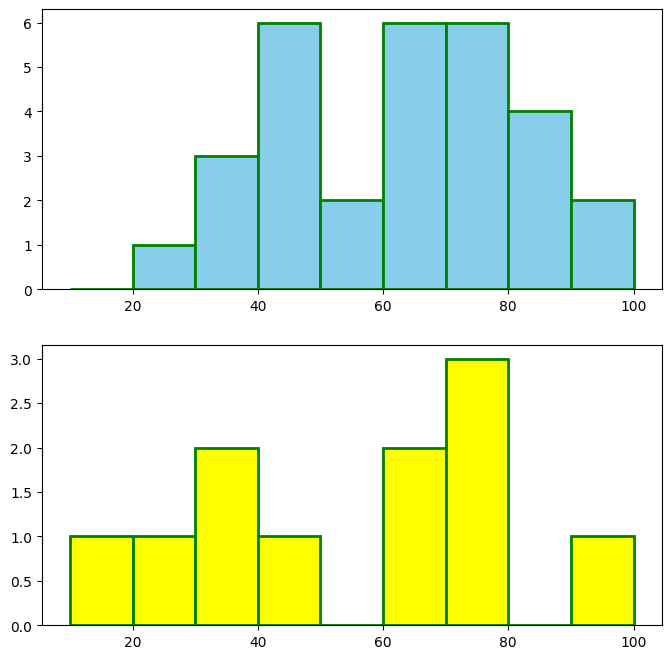

In [ ]:
# Plotting the male and female scores in different bar charts for visualisation

plt.figure(1, figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(maleScores, color='skyblue', edgecolor='green', lw=2, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.subplot(2,1,2)
plt.hist(femaleScores, color='yellow', edgecolor='green', lw=2, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

In [ ]:
# Performing the Welsh t test

from scipy.stats import ttest_ind

ttest_ind(maleScores, femaleScores, equal_var = False)

TtestResult(statistic=0.6936894455945684, pvalue=0.4991001245520197, df=14.158919197596669)

In [ ]:
pvalue=0.4991001245520197

# H0 (Null Hypothesis) i.e. no association between the gender and marks is accepted

In [ ]:
# Calculating the effect size using cohen d_s

ps.es_hedges_g_is(data['Gen_Gender'], data['Over_Grade'])

,g,version
0,0.282253,Cohen ds (Hedges g (uncorrected)


In [ ]:
d_s = 0.282253

if d_s < 0.01:
  print('Negligible')

elif d_s < 0.2:
  print('very small')

elif d_s < 0.5:
  print('small')

elif d_s < 0.8:
  print('medium')

elif d_s < 1.2:
  print('large')

elif d_s < 2:
  print('very large')

else:
  print('huge')

small


Welsh t test applied to the data not find any evidence to reject the hypothesis that there is no evidence between gender and marks obtained as pvalue = 0.49. With the cohen d value as 0.28 the strength of association is also found to be small

## d. Nominal vs. Nominal: Pearson Chi-square Test

In [ ]:
#H0 - There is no relation between marriage status and the type of life
#Ha - There is a relation between marriage status and the type of life


data2 = pandas.read_csv('GSS2012a.csv')

data2.head()

<ipython-input-5-3fe711e2e6f3>:1: DtypeWarning: Columns (11,115,123,187,274,284,287,288,290,291,292,397,585,595,628,632) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pandas.read_csv('GSS2012a.csv')


,year,id,mar1,BMITZVAH,accntsci,age,sex,life,ENGDO,SCIENTBR,...,wrksch,wrkslf,wrkstat,wrkwayup,wwwhr,wwwmin,xmarsex,xmovie,xnorcsiz,zodiac
0,2012.0,1.0,MARRIED,NaN,NaN,22.0,MALE,EXCITING,NaN,NaN,...,WORK PART-TIME,SOMEONE ELSE,WORKING PARTTIME,AGREE SOMEWHAT,5.0,NaN,ALWAYS WRONG,NaN,"UNINC,MED CITY",LIBRA
1,2012.0,6.0,DIVORCED,NaN,NaN,50.0,FEMALE,NaN,NaN,NaN,...,WORK FULL-TIME,SOMEONE ELSE,OTHER,AGREE SOMEWHAT,0.0,0.0,SOMETIMES WRONG,NaN,"CITY,50-250000",TAURUS
2,2012.0,7.0,MARRIED,NaN,NaN,35.0,FEMALE,NaN,NaN,NaN,...,NaN,SOMEONE ELSE,KEEPING HOUSE,AGREE SOMEWHAT,2.0,NaN,NaN,NO,"CITY,50-250000",SCORPIO
3,2012.0,9.0,SEPARATED,NaN,NaN,28.0,FEMALE,ROUTINE,NaN,NaN,...,WORK PART-TIME,NaN,KEEPING HOUSE,AGREE STRONGLY,NaN,NaN,ALWAYS WRONG,NaN,"CITY,50-250000",LIBRA
4,2012.0,11.0,DIVORCED,NaN,NaN,55.0,MALE,ROUTINE,NaN,NaN,...,NaN,SOMEONE ELSE,OTHER,NaN,14.0,NaN,SOMETIMES WRONG,NaN,"SUBURB, MED CITY",PISCES


In [ ]:
# Creating crosstable with 'mar1' and 'life' data columns

dataviz = pandas.crosstab(data2['mar1'], data2['life'])
dataviz

life,DULL,EXCITING,ROUTINE
mar1,,,
DIVORCED,10,111,79
MARRIED,20,354,269
NEVER MARRIED,14,134,115
SEPARATED,3,22,32
WIDOWED,14,39,55


<function matplotlib.pyplot.show(close=None, block=None)>

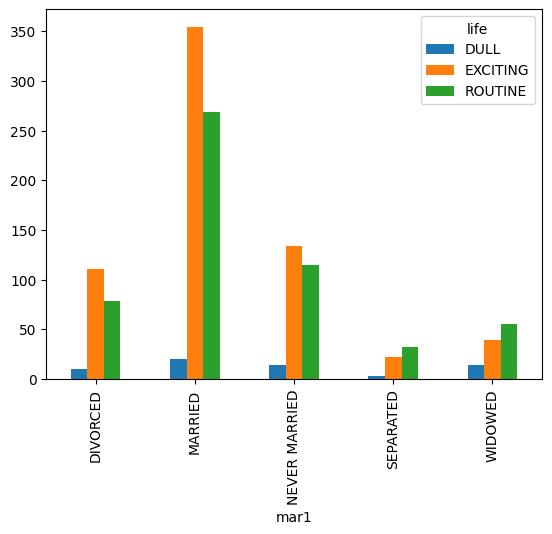

In [ ]:
dataviz.plot(kind = 'bar')
plt.show

In [ ]:
#H0 -  marital status vs feeling of life (no connection or no relationship)
#Ha -  marital status vs feeling of life ( connection or  relationship)

from scipy.stats import chi2_contingency

chi2_contingency(dataviz)

Chi2ContingencyResult(statistic=32.535800204049536, pvalue=7.464877390427598e-05, dof=8, expected_freq=array([[  9.59874115, 103.8552321 ,  86.54602675],
       [ 30.85995279, 333.8945712 , 278.245476  ],
       [ 12.62234461, 136.56963021, 113.80802518],
       [  2.73564123,  29.59874115,  24.66561762],
       [  5.18332022,  56.08182533,  46.73485445]]))

In [ ]:
pvalue=7.464877390427598e-05

# H0 is rejected

In [ ]:
# Calculating the effect size using Pearson Chi-square test

chi2table = ps.ts_pearson_ind(data2['mar1'], data2['life'])
chi2table


,n,n rows,n col.,statistic,df,p-value,min. exp.,prop. exp. below 5,test
0,1271.0,5,3,32.5358,8,0.000075,2.735641,0.066667,Pearson chi-square test of independence


In [ ]:
n = chi2table['n'][0]
nrows = chi2table['n rows'][0]
ncols =  chi2table['n col.'][0]
stat = chi2table['statistic'][0]

ps.es_cramer_v_ind(stat, n, nrows, ncols)

0.11313395589484188

In [ ]:
V = 0.11313395589484188

In [ ]:
# Degree of freedom (df)

df = min(nrows, ncols)-1
df

2

In [ ]:
if df == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

qual

'small'

The pearson chi square test found a relation between the marital status and the feeling of life and the cramer v test found the strength of association to be small

## e. Nominal vs. Ordinal: Kruskal-Wallis H Test

In [ ]:
#H0 - There is no influence of the place of school and the feeling of the activities
#Ha - There is an influence of the place of school and the feeling of the activities

# Creating a table representation of the nominal(Location) and the ordinal(Mix_NrAct) data

pandas.crosstab(data['Location'], data['Mix_NrAct'])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Location,,,,,
Diemen,8,1,2,6,0
Haarlem,12,1,0,4,2
Rotterdam,7,0,0,5,3


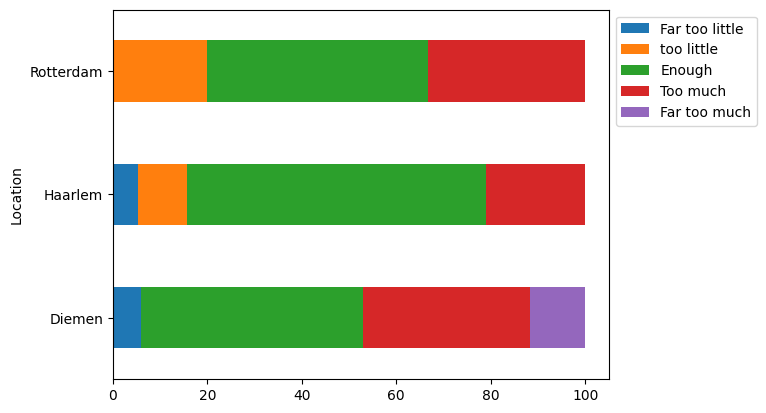

In [ ]:
coding = {'Far too little':0, 'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4}

ps.vi_bar_stacked_multiple(data['Location'], data['Mix_NrAct'], coding)

In [ ]:
# Implementing the kruskal wallis h test

from scipy.stats import kruskal

# Saving the collective data of Mix_NrAct and the Location data as per city names

rotterdamScores = data['Mix_NrAct'][data['Location'] == 'Rotterdam'].dropna()
diemenScores = data['Mix_NrAct'][data['Location'] == 'Diemen'].dropna()
haarlemScores = data['Mix_NrAct'][data['Location'] == 'Haarlem'].dropna()

# replacing the Mix_NrAct string values as numbers for each city

rotterdamScores = rotterdamScores.replace(coding)
diemenScores = diemenScores.replace(coding)
haarlemScores = haarlemScores.replace(coding)


In [ ]:
# Performing the kruskal wallis h test

kruskal(rotterdamScores, diemenScores, haarlemScores)

KruskalResult(statistic=3.335068971240797, pvalue=0.1887117641109804)

In [ ]:
pvalue=0.1887117641109804

# null hypothesis is accepted

In [ ]:
# Calculating the effect size using Epsilon square

H = 3.335068971240797
n = pandas.crosstab(data['Location'], data['Mix_NrAct']).sum().sum()
print(H, n)

3.335068971240797 51


In [ ]:
esq = H * ((n+1)/ (n**2 -1))

esq

0.06670137942481594

In [ ]:
if esq < 0.01:
  print('Negligible')
elif esq < 0.04:
  print('weak')
elif esq < 0.16:
  print('moderate')
elif esq < 0.36:
  print('relatively strong')
elif esq < 0.64:
  print('strong')
else:
  print('very strong')


moderate


The kruskal wallis h test does not found any influence of the place of school anf the feeling of the activities (p=0.18)
Also the epsilon square test was moderate (esq=0.066)

## f. Nominal vs. Scale: One-way ANOVA Test

In [ ]:
# H0 - There is no influence of location on marks obtained
# Ha - There is an influence of location on marks obtained

# grouping the nominal (Location) and the Scale (Over_Grade) together and performing mathematical operations

data.groupby('Location')['Over_Grade'].agg(['mean', 'median', 'std', 'min', 'max'])


,mean,median,std,min,max
Location,,,,,
Diemen,74.625000,70.0,14.536735,40.0,100.0
Haarlem,51.947368,45.0,19.432143,20.0,90.0
Rotterdam,47.153846,50.0,26.807481,10.0,98.0


In [ ]:
rotterdamScores = data['Over_Grade'][data['Location']=='Rotterdam'].dropna()
diemenScores = data['Over_Grade'][data['Location']=='Diemen'].dropna()
haarlemScores = data['Over_Grade'][data['Location']=='Haarlem'].dropna()

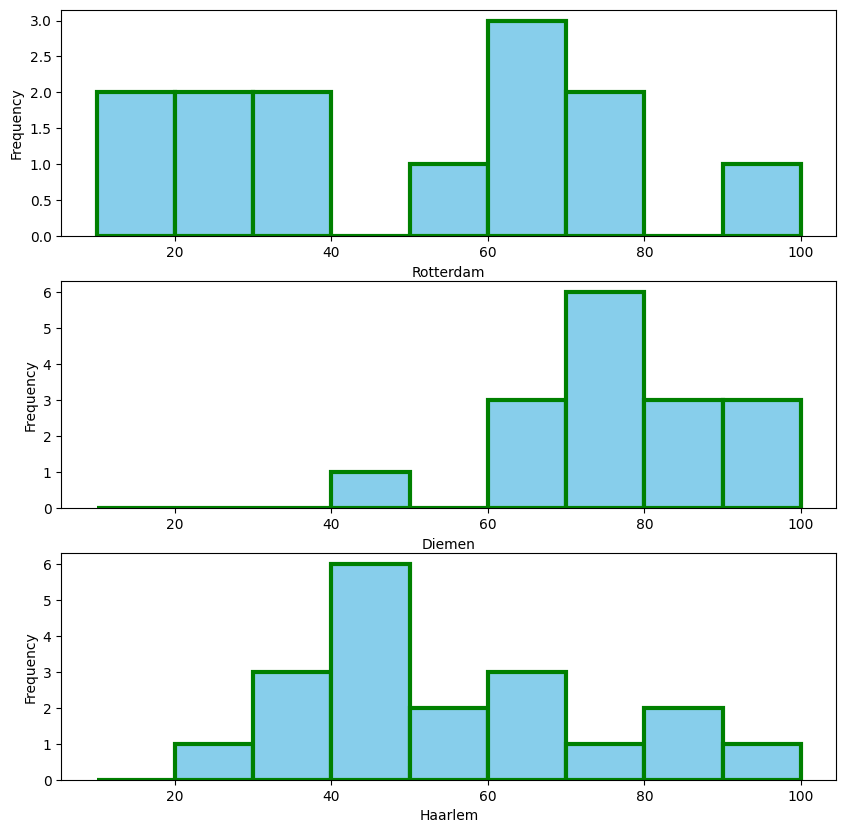

In [ ]:
plt.figure(1, figsize=(10,10))

plt.subplot(3,1,1)
plt.hist(rotterdamScores, color='skyblue', edgecolor='green', lw=3, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Rotterdam')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
plt.hist(diemenScores, color='skyblue', edgecolor='green', lw=3, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Diemen')
plt.ylabel('Frequency')


plt.subplot(3,1,3)
plt.hist(haarlemScores, color='skyblue', edgecolor='green', lw=3, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Haarlem')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Welch ANOVA

!pip install pingouin
import pingouin as pin

pin.welch_anova(dv = 'Over_Grade', between = 'Location', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,Location,2,26.071911,10.195117,0.000536,0.263336


In [ ]:
pvalue = 0.000536

# Null hypothesis is rejected


In [ ]:
# Calculating the effect size

eta_sq = 0.263336

if eta_sq < 0.01:
  print('Negligible')
elif eta_sq < 0.06:
  print('small')
elif eta_sq < 0.14:
  print('medium')
else:
  print('large')

large


Welsh ANOVA has found a influence of location on marks obtained p=0.000536 and further the influence is a large influence (eta_sq=0.26)

## g. Ordinal vs. Ordinal: Goodman-Kruskal Gamma Test

In [ ]:
# H0 - There is no relation between the teaching motivation and the theory knowledge grasped
# H0 - There is a relation between the teaching motivation and the theory knowledge grasped

# Creating a crosstab between the two ordinal data columns Teach_Motivate and Teach_LinkTheory

dataviz = pandas.crosstab(data['Teach_Motivate'], data['Teach_LinkTheory'])
dataviz

Teach_LinkTheory,Agree,Disagree,Fully Disagree,Fully agree,Neither disagree nor agree
Teach_Motivate,,,,,
Agree,4,0,0,0,3
Disagree,1,5,1,0,2
Fully Disagree,0,7,10,0,3
Fully agree,1,0,0,5,0
Neither disagree nor agree,2,0,0,2,8


<function matplotlib.pyplot.show(close=None, block=None)>

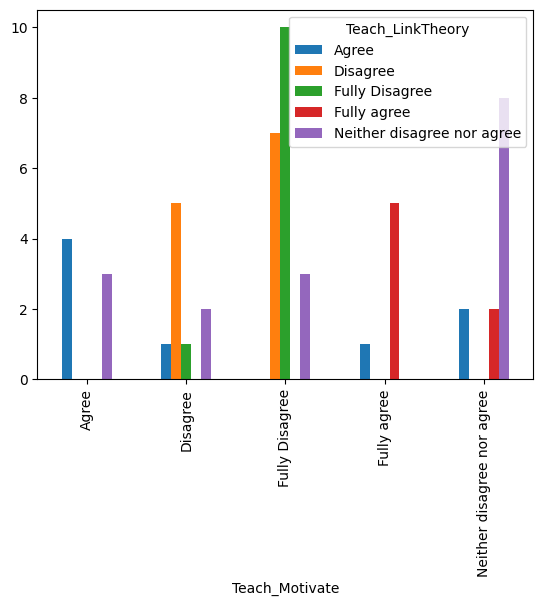

In [ ]:
# Plotting a bar graph

dataviz.plot(kind = 'bar')
plt.show

In [ ]:
# Implementing the Goodman Kruskal gamma test

from scipy.stats import norm

def goodmanKruskalgamma(data, ordinal1, ordinal2, orderLabels1, orderLabels2=None):
    myCrosstable = pandas.crosstab(data[ordinal1], data[ordinal2])

    myCrosstable = myCrosstable.reindex(orderLabels1)

    if orderLabels2 == None:
        myCrosstable = myCrosstable[orderLabels1]
    else:
        myCrosstable = myCrosstable[orderLabels2]

    nRows = myCrosstable.shape[0]
    nCols = myCrosstable.shape[1]


    C = [[0 for x in range(nCols)] for y in range(nRows)]

    # top left part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j-1
            if h>=0 and k>=0:
                for p in range(h+1):
                    for q in range(k+1):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    # bottom right part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j+1
            if h<nRows and k<nCols:
                for p in range(h, nRows):
                    for q in range(k, nCols):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    D = [[0 for x in range(nCols)] for y in range(nRows)]

    # bottom left part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j-1
            if h<nRows and k>=0:
                for p in range(h, nRows):
                    for q in range(k+1):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    # top right part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j+1
            if h>=0 and k<nCols:
                for p in range(h+1):
                    for q in range(k, nCols):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    P = 0
    Q = 0
    for i in range(nRows):
        for j in range(nCols):
            P = P + C[i][j] * list(myCrosstable.iloc[i])[j]
            Q = Q + D[i][j] * list(myCrosstable.iloc[i])[j]

    GKgamma = (P - Q) / (P + Q)

    if abs(GKgamma) < .10:
        qual = 'Negligible'
    elif abs(GKgamma) < .20:
        qual = 'Weak'
    elif abs(GKgamma) < .40:
        qual = 'Moderate'
    elif abs(GKgamma) < .60:
        qual = 'Relatively strong'
    elif abs(GKgamma) < .80:
        qual = 'Strong'
    else:
        qual = 'Very strong'

    n = myCrosstable.sum().sum()

    Z1 = GKgamma * ((P + Q) / (n * (1 - GKgamma**2)))**0.5

    forASE0 = 0
    forASE1 = 0
    for i in range(nRows):
        for j in range(nCols):
            forASE0 = forASE0 + list(myCrosstable.iloc[i])[j] * (Q * C[i][j] - P * D[i][j])**2
            forASE1 = forASE1 + list(myCrosstable.iloc[i])[j] * (C[i][j] - D[i][j])**2

    ASE0 = 4 * (forASE0)**0.5 / (P + Q)**2
    ASE1 = 2 * (forASE1 - (P - Q)**2 / n)**0.5 / (P + Q)
    Z2 = GKgamma / ASE0
    Z3 = GKgamma / ASE1

    p1 = norm.sf(Z1)
    p2 = norm.sf(Z2)
    p3 = norm.sf(Z3)

    zvalues = [Z1] + [Z2] + [Z3]
    pvalues = [p1] + [p2] + [p3]

    return (GKgamma,qual), zvalues, pvalues

In [ ]:
# finding the unique values in the Teach_Motivate and Teach_LinkTheory data tables

data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
data['Teach_LinkTheory'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', 'Agree', nan], dtype=object)

In [ ]:
# Storing the unique values in a variable

ordinalVar1 = ['Fully Disagree', 'Disagree', 'Neither disagree nor agree', 'Agree', 'Fully agree',]
ordinalVar2 = ['Fully Disagree', 'Disagree', 'Neither disagree nor agree', 'Agree', 'Fully agree',]

# Applying the goodmanKruskalgamma function

goodmanKruskalgamma(data, 'Teach_Motivate', 'Teach_LinkTheory', ordinalVar1, ordinalVar2)

((0.8768577494692145, 'Very strong'),
 [10.773417534483025, 20.604715459769057, 13.303495586919903],
 [2.2980867366283263e-27, 1.2448922299482576e-94, 1.104473066321668e-40])

In [ ]:
pvalue = 1.104473066321668e-40

SInce the result is significant 'Very Strong' the null hypothesis is rejected showing an impact on the 'Teach_Motivate' and 'Teach_LinkTheory'

## h. Ordinal vs. Scale: Spearman Test

In [ ]:
# H0 - The teaching motivation does not affect the overall grade of the students
# Ha - The teaching motivation does affect the overall grade of the students

# Grouping the Ordinal and the Scale data columns

data.groupby('Teach_Motivate')['Over_Grade'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
Teach_Motivate,,,,,
Agree,78.000000,75.0,12.179217,65.0,98.0
Disagree,52.777778,50.0,18.219343,20.0,80.0
Fully Disagree,36.812500,38.0,14.725120,10.0,65.0
Fully agree,84.600000,85.0,10.526158,70.0,98.0
Neither disagree nor agree,69.181818,70.0,16.898628,30.0,100.0


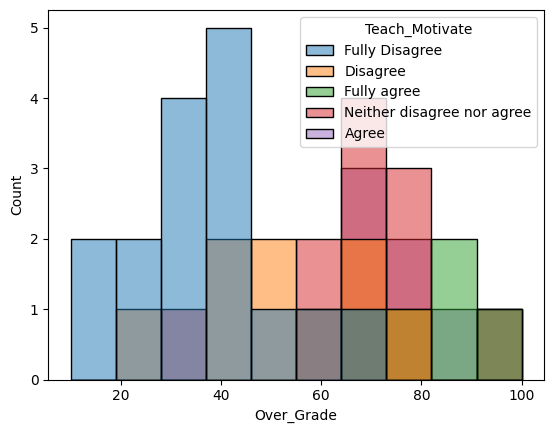

In [ ]:
# importing the seaborn module

import seaborn as sns

sns.histplot(data = data, x= 'Over_Grade', hue = 'Teach_Motivate',  bins = 10, multiple='dodge')
plt.show()

In [ ]:
data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
coding = {'Fully Disagree':0, 'Disagree':1, 'Neither disagree nor agree':2, 'Agree':3, 'Fully agree':4}

In [ ]:
mydata = data[['Teach_Motivate', 'Over_Grade']]

mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)

<ipython-input-34-e4601c596a82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)


In [ ]:
mydata.corr(method='spearman')

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


In [ ]:
# implementing the spearman test

from scipy.stats import spearmanr

spearmanr(mydata, nan_policy='omit')

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

In [ ]:
statistic=0.7871998951252405
pvalue=3.236363793284169e-11

rho = abs(statistic)

if rho < 0.10:
  print('Negligible')
elif rho < 0.20:
  print('weak')
elif rho < 0.40:
  print('moderate')
elif rho < 0.60:
  print('relatively strong')
elif rho < 0.80:
  print('strong')
else:
  print('very strong')

strong


Thus we can say that both the data columns 'Teach_Motivate' and 'Over_Grade' has a strong impact.

## i. Scale vs. Scale: Pearson Correlation Test

In [ ]:
# H0 - The age does not impact the overall grade of the students
# Ha - The age does impact the overall grade of the students

# Describing the two data columns of Scale variables with mean, medium and mode

data[['Gen_Age', 'Over_Grade']].describe()

,Gen_Age,Over_Grade
count,44.000000,48.000000
mean,24.454545,58.208333
std,15.144965,23.171845
min,18.000000,10.000000
25%,19.000000,40.000000
50%,21.000000,64.000000
75%,24.250000,75.000000
max,119.000000,100.000000


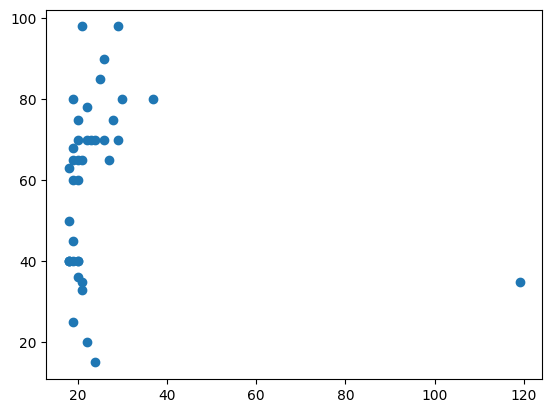

In [ ]:
plt.scatter(data['Gen_Age'], data['Over_Grade'])
plt.show()

In [ ]:
# Dropping the null values

newdf = data[['Gen_Age', 'Over_Grade']].dropna()

# Implementing the pearson Corelation test

from scipy.stats import pearsonr

pearsonr(newdf['Gen_Age'], newdf['Over_Grade'])

PearsonRResult(statistic=-0.06061251564426085, pvalue=0.7139570447292615)

In [ ]:
statistic=-0.06061251564426085
pvalue=0.7139570447292615

rho = abs(statistic)

if rho < 0.10:
  print('Negligible')
elif rho < 0.20:
  print('weak')
elif rho < 0.40:
  print('moderate')
elif rho < 0.60:
  print('relatively strong')
elif rho < 0.80:
  print('strong')
else:
  print('very strong')

Negligible


The negligible significance shows that age does not have any impact on grades. rho = 0.06 and p = 0.71